<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Actividades_clase/Actividad_07_derivadas.pynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Actividad 7
### Métodos computacionales para físicos  y astrónomos
### Universidad de Antioquia
### Prof: Hernan D. Salinas Jiménez
Ref: https://github.com/restrepo/ComputationalMethods

El potencial eléctrico de un anillo de radio R, en la parte superior z del anillo, viene dado por: 


\begin{equation}
V = \frac{kq_{tot}z}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para z>0 y R=0.1mm. Reescale el problema en unidades de $kq_{tot}$ empleando:

#####1. La libreria sympy.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy  as sp




In [ ]:
# Definir la función potencial eléctrico reescalado:

z=sp.Symbol('z')
R_s=sp.Symbol('R')
V_s= z/sp.sqrt(z**2 + R_s**2)
V_s

z/sqrt(R**2 + z**2)

In [ ]:
# Definir la función campo eléctrico reescalado:

z=sp.Symbol('z')
R_s=sp.Symbol('R')
E_s=sp.diff(V_s,z)
E_s


-z**2/(R**2 + z**2)**(3/2) + 1/sqrt(R**2 + z**2)

In [ ]:
# Convertimos la función potencial y campo electrico simbolicas en funciones numericas:

V_n = sp.lambdify([z,R_s],V_s,'numpy')
E_n = sp.lambdify([z, R_s],E_s,'numpy')


#Consideremos el siguiente rango de vaores que nos permita graficar la funcion potencial eléctrico:

zn = np.linspace(0,3,100)
R = 0.1   ## Radio del anillo, en mm
Vnn = V_n(zn,R)
Enn=E_n(zn,R)

Enn

array([1.00000000e+01, 8.76534547e+00, 6.25460335e+00, 4.05125561e+00,
       2.57724447e+00, 1.67140475e+00, 1.11923548e+00, 7.75372422e-01,
       5.54505775e-01, 4.07980534e-01, 3.07753673e-01, 2.37259722e-01,
       1.86426115e-01, 1.48946838e-01, 1.20762632e-01, 9.91922003e-02,
       8.24220415e-02, 6.91988446e-02, 5.86392694e-02, 5.01095000e-02,
       4.31472839e-02, 3.74104320e-02, 3.26421535e-02, 2.86473131e-02,
       2.52759074e-02, 2.24113917e-02, 1.99623207e-02, 1.78562839e-02,
       1.60354543e-02, 1.44532841e-02, 1.30720265e-02, 1.18608592e-02,
       1.07944504e-02, 9.85185337e-03, 9.01564791e-03, 8.27126799e-03,
       7.60647194e-03, 7.01092173e-03, 6.47584703e-03, 5.99377516e-03,
       5.55831290e-03, 5.16396909e-03, 4.80600984e-03, 4.48033957e-03,
       4.18340295e-03, 3.91210368e-03, 3.66373688e-03, 3.43593261e-03,
       3.22660856e-03, 3.03393013e-03, 2.85627678e-03, 2.69221349e-03,
       2.54046644e-03, 2.39990234e-03, 2.26951061e-03, 2.14838827e-03,
      

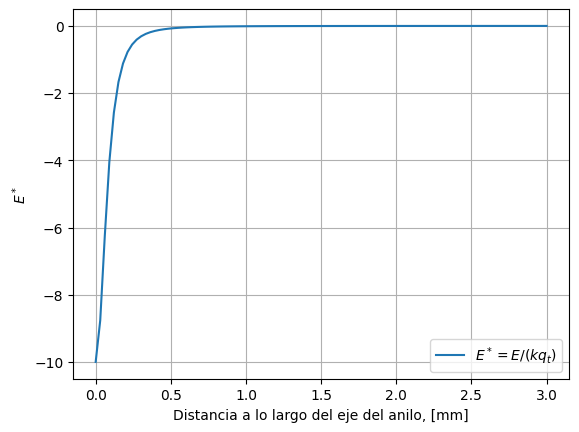

In [ ]:
#Grafico del campo electrico:

plt.plot(zn,-Enn,label='$ E^* = E/(kq_t)$')
plt.xlabel('Distancia a lo largo del eje del anilo, [mm]')
plt.ylabel('$ E^*$')
plt.grid()
plt.legend()

##### 2. Calcular el campo en el punto  $z = 0.1mm$ empleando el metodo [misc.derivative](https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

def V(z,R):
  return z/np.sqrt(z**2 + R**2)

R  = 0.1 ## Radio del anillo, en mm
z0 = R   ## Evaluaremos la derivada del potencial a un radio de distancia del centro del anillo cargado electricamente.

DV_=derivative(V,z0,1e-3,args=(R,))

DV_


<ipython-input-58-2f11a61e0aab>:11: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  DV_=derivative(V,z0,1e-3,args=(R,))


3.535666485968092

#####3. Calcular el campo para diferentes valores de z con z>0,,  empleando misc derivative. Construya un grafico de E vs z.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative




#Definimos un areglo de  numpy sobre el cual hallaremos el valor de la derivada de la función potencial.

zn=np.linspace(0,3,100)
h= zn[1]-zn[0]
dV=np.zeros(len(zn))

for i in range(len(zn)):
  dV[i]=derivative(V,zn[i],dx=h,args=(R,))

dV


<ipython-input-63-bad659e7f2e5>:15: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  dV[i]=derivative(V,zn[i],dx=h,args=(R,))


array([9.57024404e+00, 8.55197832e+00, 6.31397908e+00, 4.17568078e+00,
       2.67195411e+00, 1.72990340e+00, 1.15361790e+00, 7.95674425e-01,
       5.66786103e-01, 4.15635792e-01, 3.12674494e-01, 2.40516271e-01,
       1.88639761e-01, 1.50488585e-01, 1.21860234e-01, 9.99892077e-02,
       8.30111906e-02, 6.96414223e-02, 5.89766341e-02, 5.03701026e-02,
       4.33510438e-02, 3.75715230e-02, 3.27708122e-02, 2.87510351e-02,
       2.53602511e-02, 2.24805278e-02, 2.00194128e-02, 1.79037563e-02,
       1.60751824e-02, 1.44867313e-02, 1.31003446e-02, 1.18849614e-02,
       1.08150662e-02, 9.86956953e-03, 9.03093932e-03, 8.28452145e-03,
       7.61800425e-03, 7.02099381e-03, 6.48467486e-03, 6.00153844e-03,
       5.56516179e-03, 5.17002965e-03, 4.81138835e-03, 4.48512597e-03,
       4.18767367e-03, 3.91592390e-03, 3.66716237e-03, 3.43901127e-03,
       3.22938164e-03, 3.03643328e-03, 2.85854089e-03, 2.69426542e-03,
       2.54232959e-03, 2.40159714e-03, 2.27105499e-03, 2.14979794e-03,
      

In [ ]:
# Aunque, segun parece, el metodo misc.derivative nde scipy nos permite insertar arrays para que nos retorne los respectivos valores de la derivada de la funcion de interes

dV2=derivative(V,zn,dx=h,args=(R,))
dV2

<ipython-input-64-ec167ae3deb3>:3: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  dV2=derivative(V,zn,dx=h,args=(R,))


array([9.57024404e+00, 8.55197832e+00, 6.31397908e+00, 4.17568078e+00,
       2.67195411e+00, 1.72990340e+00, 1.15361790e+00, 7.95674425e-01,
       5.66786103e-01, 4.15635792e-01, 3.12674494e-01, 2.40516271e-01,
       1.88639761e-01, 1.50488585e-01, 1.21860234e-01, 9.99892077e-02,
       8.30111906e-02, 6.96414223e-02, 5.89766341e-02, 5.03701026e-02,
       4.33510438e-02, 3.75715230e-02, 3.27708122e-02, 2.87510351e-02,
       2.53602511e-02, 2.24805278e-02, 2.00194128e-02, 1.79037563e-02,
       1.60751824e-02, 1.44867313e-02, 1.31003446e-02, 1.18849614e-02,
       1.08150662e-02, 9.86956953e-03, 9.03093932e-03, 8.28452145e-03,
       7.61800425e-03, 7.02099381e-03, 6.48467486e-03, 6.00153844e-03,
       5.56516179e-03, 5.17002965e-03, 4.81138835e-03, 4.48512597e-03,
       4.18767367e-03, 3.91592390e-03, 3.66716237e-03, 3.43901127e-03,
       3.22938164e-03, 3.03643328e-03, 2.85854089e-03, 2.69426542e-03,
       2.54232959e-03, 2.40159714e-03, 2.27105499e-03, 2.14979794e-03,
      

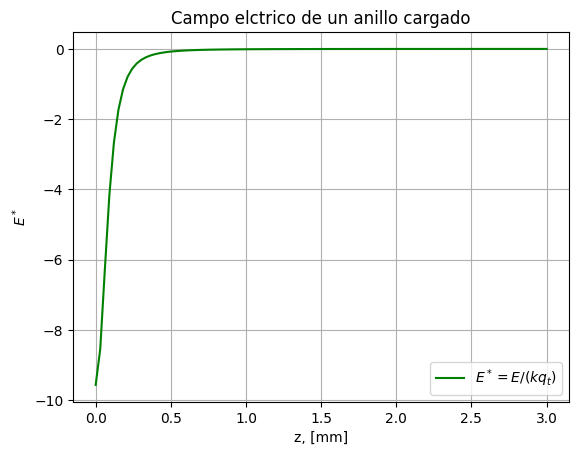

In [ ]:
plt.title('Campo elctrico de un anillo cargado')
plt.plot(zn,-dV2,label='$ E^* = E/(kq_t)$',color='green')
plt.xlabel('z, [mm]')
plt.ylabel('$ E^*$')
plt.grid()
plt.legend()

#####4. Entender la generalizacion de la siguiente función, y aplicarla para calcular la derivada.


```python
import numpy as np
from scipy import misc
def derivative(func,x0,**kwargs):
    '''
    Vectorized replacement of scipy.misc derivative:
        from scipy.misc import derivative
    For usage check the derivative help, e.g, in jupyter: 
        from scipy.misc import derivative
        derivative?
    '''
    try:
        #x0: can be an array or a list  
        nn=np.asarray(x0).shape[0] ## force error if float is used 
        fp=np.vectorize(misc.derivative)
    except IndexError:
        fp=misc.derivative
        
    return fp(func,x0,**kwargs)

assert isinstance(derivative(np.sin,1,dx=1E-6),float)
```


In [ ]:
import numpy as np
from scipy import misc

def derivative(func,x0,**kwargs):
  try:
        #x0: can be an array or a list  
        nn=np.asarray(x0).shape[0] ## force error if float is used 
        fp=np.vectorize(misc.derivative)

  except IndexError:
        fp=misc.derivative


  return fp(func,x0,**kwargs)




In [ ]:
derivative(np.sin, [2,1], dx=1E-6)

array([-0.41614684,  0.54030231])